In [58]:
import pandas as pd
import numpy as np

In [59]:
path = r'C:\Users\godsw\Desktop\Study\Data Science\IBM\clean_df.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495,11.190476,8.703704,Low,0,1
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500,11.190476,8.703704,Low,0,1
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500,12.368421,9.038462,Medium,0,1
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950,9.791667,7.833333,Low,0,1
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450,13.055556,10.681818,Low,0,1


In [60]:
df.to_csv('module_5_auto.csv')

In [62]:
#get numeric data
df = df._get_numeric_data()
df.head()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas
0,0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,...,9.0,111,5000.0,21,27,13495,11.190476,8.703704,0,1
1,1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,...,9.0,111,5000.0,21,27,16500,11.190476,8.703704,0,1
2,2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,...,9.0,154,5000.0,19,26,16500,12.368421,9.038462,0,1
3,3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,...,10.0,102,5500.0,24,30,13950,9.791667,7.833333,0,1
4,4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,...,8.0,115,5500.0,18,22,17450,13.055556,10.681818,0,1


Libraries for plotting

In [63]:
%%capture
!pip install ipywidgets

In [64]:
from ipywidgets import interact, interactive, fixed, interact_manual

Functions for plotting

In [66]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [67]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

Training and Testing

In [68]:
#placing target data, price, in a separate dataframe
y_data = df['price']

In [69]:
x_data = df.drop('price', axis = 1)

In [70]:
#Randomly split data into training and testing data using the function train_test_split
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [71]:
#import LinearRegression from linear_model
from sklearn.linear_model import LinearRegression

In [72]:
#create linear regression object
lre = LinearRegression()

In [73]:
#fit model using horsepower
lre.fit(x_train[['horsepower']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
#calculate R^2 on the test data
lre.score(x_test[['horsepower']], y_test)

0.36354806249624133

In [75]:
#R^2 on the train data
lre.score(x_train[['horsepower']],y_train)

0.662028747521533

In [76]:
#performing cross-validation
from sklearn.model_selection import cross_val_score

In [77]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220592359225414 and the standard deviation is 0.29130480666118436


In [78]:
#using cross_val_predict to predict output
from sklearn.model_selection import cross_val_predict

In [79]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

Overfitting, Underfitting and Model Selection

In [80]:
#Creating Multiple linear regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [81]:
lr = LinearRegression()
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
#Prediction using training data
yhat_train = lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])

In [90]:
yhat_train[0:5]

array([ 7426.34910902, 28324.42490838, 14212.74872339,  4052.80810192,
       34499.8541269 ])

In [91]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.68099115,  5884.25292475, 11208.31007475,  6641.03017109,
       15565.98722248])

In [92]:
#Model evaluation using training and testing data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

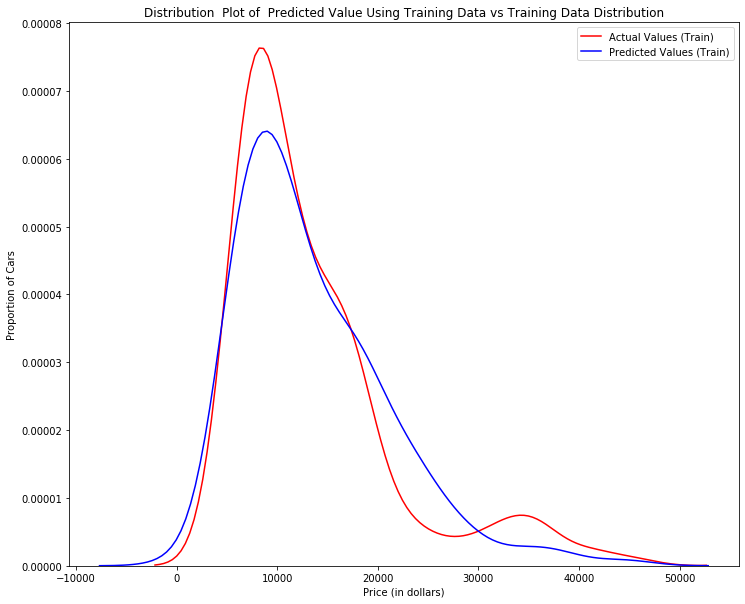

In [93]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

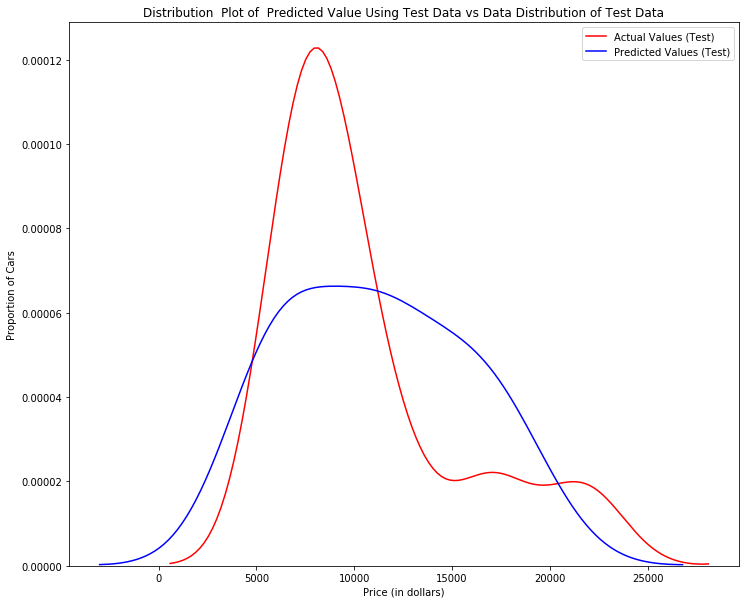

In [94]:
#Plotting test data
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)